# Projekt z WMH



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
%matplotlib inline
from sklearn import svm
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import pandas as pd

In [ ]:
def fun(x,y):
    return np.log10(np.abs(x))*5*np.cos(y)+(0.55*(x+y))

In [ ]:
x = np.outer(np.linspace(-10, 10, 100), np.ones(100))
y = x.copy().T
z = fun(x,y)

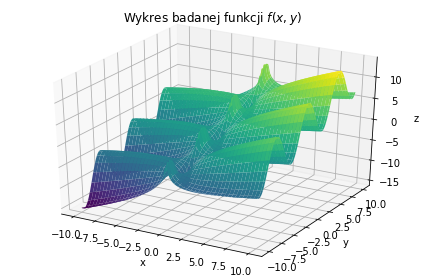

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(x, y, z, cmap='viridis', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.title("Wykres badanej funkcji $f(x,y)$")
plt.tight_layout()
plt.show()

In [ ]:
X = np.column_stack((x.flatten(), y.flatten()))
y = z.flatten()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=85)

In [ ]:
X_scaler = StandardScaler()
X_train = X_scaler.fit_transform(X_train)
X_test = X_scaler.transform(X_test)

In [ ]:
y_scaler = StandardScaler()
y_train = y_scaler.fit_transform(y_train[:,None])[:,0]
y_test = y_scaler.transform(y_test[:,None])[:,0]

In [ ]:
model = svm.SVR(C=1.0, epsilon=0.2)
model.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [ ]:
print(f"R2 na zbiorze trenującym: {model.score(X_train, y_train)}")
print(f"R2 na zbiorze testującym: {model.score(X_test, y_test)}")

R2 na zbiorze trenującym: 0.824360801241379
R2 na zbiorze testującym: 0.8045423903710172


In [ ]:
mse_train = metrics.mean_squared_error(y_train, y_pred_train)
mse_test = metrics.mean_squared_error(y_test, y_pred_test)

print(f"MSE na zbiorze trenującym: {mse_train}")
print(f"MSE na zbiorze testującym: {mse_test}")

MSE na zbiorze trenującym: 0.17563919875862097
MSE na zbiorze testującym: 0.18113517183995706


In [ ]:
mae_train = metrics.mean_absolute_error(y_train, y_pred_train)
mae_test = metrics.mean_absolute_error(y_test, y_pred_test)

print(f"MAE na zbiorze trenującym: {mae_train}")
print(f"MAE na zbiorze testującym: {mae_test}")

MAE na zbiorze trenującym: 0.3318041616489189
MAE na zbiorze testującym: 0.33452509629604915


## Grid search - parametry


In [ ]:
parameters_rbf = {
  'kernel':('rbf',),
  'C': [0.0001, 0.01, 1.0, 100.0, 10000.0,],
  'epsilon': [0.0001, 0.01, 1.0, 100.0, 10000.0]
}

parameters_linear = {
  'kernel':('linear',),
  'C': [0.001, 0.01, 0.1, 1.0, 10.0, 50.0],
  'epsilon': [0.001, 0.01, 1.0, 10.0, 100.0],
}

parameters_poly = {
  'kernel':('poly',),
  'degree': [2, 3, 4, 5, 6],
  'C': [0.01, 0.1, 1.0, 10.0, 100.0],
  'epsilon': [0.01, 0.1, 1.0, 10.0, 100.0],
  'coef0': [-100.0, -10.0, 0, 10, 100]
}

parameters_sigmoid = {
  'kernel':('sigmoid',),
  'C': [0.01, 0.1, 1.0, 10.0, 100.0],
  'epsilon': [0.01, 0.1, 1.0, 10.0, 100.0],
  'coef0': [-100.0, -10.0, 0, 10, 100]
}

In [ ]:
clf_results = {}
for (name, parameters) in [('rbf', parameters_rbf), ('linear', parameters_linear), ('poly', parameters_poly), ('sigmoid', parameters_sigmoid)]:
  svr = svm.SVR()
  clf = GridSearchCV(svr, parameters, scoring=['neg_mean_absolute_error', 'neg_mean_squared_error', 'r2'], n_jobs=-1, verbose=2, refit='r2', return_train_score=True)
  clf.fit(X_train, y_train)
  clf_results[name] = clf
  pd.DataFrame(clf.cv_results_).to_csv(f"./{name}.csv")


### Jądro rbf

In [ ]:
parameters = {
  'kernel':('rbf',),
  'C': [0.0001, 0.01, 1.0, 100.0, 10000.0,],
  'epsilon': [0.0001, 0.01, 1.0, 100.0, 10000.0]
}

svr = svm.SVR()
clf = GridSearchCV(svr, parameters)
clf.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0],
                         'epsilon': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0,
                                     1000.0],
                         'kernel': ('rbf',)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
clf.cv_results_

{'mean_fit_time': array([3.02805529e+00, 2.97448392e+00, 2.47850389e+00, 5.00059509e-01,
        1.57351494e-03, 1.50804520e-03, 1.52311325e-03, 3.00883207e+00,
        2.93308072e+00, 2.38624921e+00, 1.33258581e-01, 1.58820152e-03,
        1.53827667e-03, 1.58872604e-03, 3.14539781e+00, 3.03096128e+00,
        2.39020720e+00, 3.26451778e-02, 1.57637596e-03, 1.54371262e-03,
        1.51281357e-03, 3.47539320e+00, 3.29180493e+00, 2.52001138e+00,
        3.57205868e-02, 1.56426430e-03, 1.54118538e-03, 1.69081688e-03,
        4.85285878e+00, 4.76967063e+00, 4.12641516e+00, 3.74627113e-02,
        1.70464516e-03, 1.54294968e-03, 1.57074928e-03, 1.84701433e+01,
        1.79598874e+01, 1.67680381e+01, 3.69052410e-02, 1.56888962e-03,
        1.53112411e-03, 1.54299736e-03, 2.29327682e+02, 2.26735310e+02,
        1.43194032e+02, 3.69618893e-02, 1.60942078e-03, 1.54867172e-03,
        1.57136917e-03]),
 'mean_score_time': array([0.32177744, 0.31969743, 0.27886357, 0.05857635, 0.00070128,
      

In [ ]:
clf.best_estimator_

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.001, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
best = clf.best_estimator_
y_pred_clf = best.predict(X_test)


In [ ]:
metrics.mean_squared_error(y_test, y_pred_clf)
metrics.r2_score(y_test, y_pred_clf)

0.9645438801045113

In [ ]:
import pandas as pd

In [ ]:
clf_df = pd.DataFrame(clf.cv_results_)
clf_df.to_csv('./gridcv-rbf-first.csv')

## Zaszumienie danych

# Nowa sekcja

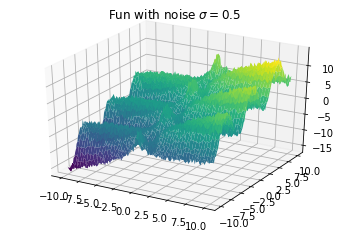

R2 na zbiorze trenującym: 0.8165082944772294
R2 na zbiorze testującym: 0.7928873005795453
MSE na zbiorze trenującym: 0.18349170552277055
MSE na zbiorze testującym: 0.19097662682899186
MAE na zbiorze trenującym: 0.3394901613916049
MAE na zbiorze testującym: 0.34474056825314975


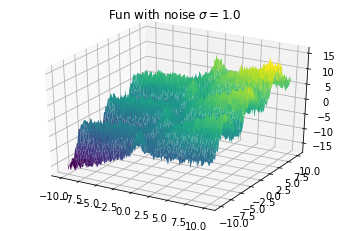

R2 na zbiorze trenującym: 0.7957147830790263
R2 na zbiorze testującym: 0.7691625056405746
MSE na zbiorze trenującym: 0.20428521692097365
MSE na zbiorze testującym: 0.2203167845332474
MAE na zbiorze trenującym: 0.3602604142053191
MAE na zbiorze testującym: 0.370904677647732


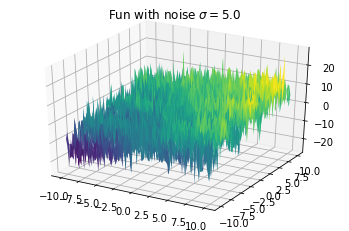

R2 na zbiorze trenującym: 0.43103980126913555
R2 na zbiorze testującym: 0.41439056798793755
MSE na zbiorze trenującym: 0.5689601987308643
MSE na zbiorze testującym: 0.5400498828182936
MAE na zbiorze trenującym: 0.5985333419852542
MAE na zbiorze testującym: 0.585205759171312


In [ ]:
x_n = np.outer(np.linspace(-10, 10, 100), np.ones(100))
y_n = x_n.copy().T
z_n = fun(x_n,y_n)
noise_levels = [0.1, 0.5, 1.0, 5.0]

for level in noise_levels:
  noise = np.random.normal(0,level,(100,100))
  noised_z = z_n + noise
    
  fig = plt.figure()
  ax = plt.axes(projection='3d')

  ax.plot_surface(x_n, y_n, noised_z, cmap='viridis', edgecolor='none')
  ax.set_title(f"Fun with noise $\sigma = {level} $")
  plt.show()

  Xn = np.column_stack((x_n.flatten(), y_n.flatten()))
  yn = noised_z.flatten()

  Xn_train, Xn_test, yn_train, yn_test = train_test_split(Xn, yn, test_size=0.1, random_state=85)

  Xn_scaler = StandardScaler()
  Xn_train = Xn_scaler.fit_transform(Xn_train)
  Xn_test = Xn_scaler.transform(Xn_test)

  yn_scaler = StandardScaler()
  yn_train = yn_scaler.fit_transform(yn_train[:,None])[:,0]
  yn_test = yn_scaler.transform(yn_test[:,None])[:,0]


  model = svm.SVR(C=1.0, epsilon=0.2)
  model.fit(Xn_train, yn_train)

  yn_pred_train = model.predict(Xn_train)
  yn_pred_test = model.predict(Xn_test)

  print(f"R2 na zbiorze trenującym: {model.score(Xn_train, yn_train)}")
  print(f"R2 na zbiorze testującym: {model.score(Xn_test, yn_test)}")

  mse_train = metrics.mean_squared_error(yn_train, yn_pred_train)
  mse_test = metrics.mean_squared_error(yn_test, yn_pred_test)

  print(f"MSE na zbiorze trenującym: {mse_train}")
  print(f"MSE na zbiorze testującym: {mse_test}")

  mae_train = metrics.mean_absolute_error(yn_train, yn_pred_train)
  mae_test = metrics.mean_absolute_error(yn_test, yn_pred_test)

  print(f"MAE na zbiorze trenującym: {mae_train}")
  print(f"MAE na zbiorze testującym: {mae_test}")


# Wyniki rbf

In [ ]:
linear = pd.read_csv("linear.csv")
linear_data = linear[['param_C', 'param_epsilon','mean_test_neg_mean_absolute_error', 'std_test_neg_mean_absolute_error',
                      'mean_train_neg_mean_absolute_error',
       'std_train_neg_mean_absolute_error', 'mean_test_neg_mean_squared_error', 'std_test_neg_mean_squared_error','mean_train_r2', 'std_train_r2']]

    param_C  param_epsilon  ...  mean_train_r2  std_train_r2
0     0.001          0.001  ...       0.749336      0.003164
1     0.001          0.010  ...       0.749449      0.003152
2     0.001          1.000  ...       0.710158      0.002443
3     0.001         10.000  ...      -0.018775      0.000918
4     0.001        100.000  ...      -0.018775      0.000918
5     0.010          0.001  ...       0.758957      0.002407
6     0.010          0.010  ...       0.759001      0.002314
7     0.010          1.000  ...       0.755735      0.001546
8     0.010         10.000  ...      -0.018775      0.000918
9     0.010        100.000  ...      -0.018775      0.000918
10    0.100          0.001  ...       0.759065      0.001935
11    0.100          0.010  ...       0.759292      0.001935
12    0.100          1.000  ...       0.758503      0.001613
13    0.100         10.000  ...      -0.018775      0.000918
14    0.100        100.000  ...      -0.018775      0.000918
15    1.000          0.0

1350


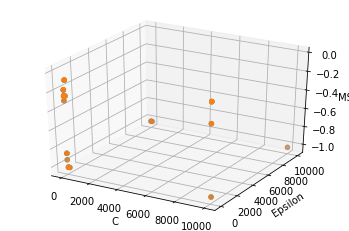

In [ ]:
import pandas as pd
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
df = pd.read_csv('rbf.csv')
print(df.size)
threedee = plt.figure().gca(projection='3d')
threedee.scatter((df['param_C']), (df['param_epsilon']), df['mean_test_neg_mean_squared_error'])
threedee.scatter((df['param_C']), (df['param_epsilon']), df['mean_train_neg_mean_squared_error'])
threedee.set_xlabel(' C')
threedee.set_ylabel('Epsilon')
threedee.set_zlabel('MSE')
plt.show()



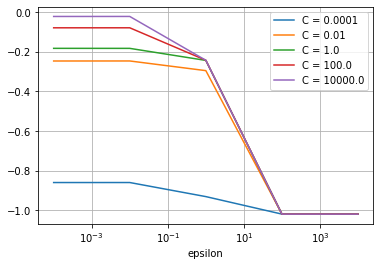

In [ ]:

for name in df.param_C.unique():
  rows =df[df['param_C']==name]
  plt.xscale('log')
  plt.xlabel('epsilon')
  plt.plot(rows['param_epsilon'], rows['mean_test_neg_mean_squared_error'], label="C = %s" %name)
plt.grid()
plt.legend()
plt.show()
